## **1. Data Understanding**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import plotly
import plotly.express as px
import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from plotly import figure_factory as FF

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder


In [2]:

from google.colab import files
uploaded = files.upload()

Saving Sample - Superstore.csv to Sample - Superstore.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Sample - Superstore.csv']), encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
pd.set_option('display.max_columns',50)

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


List all Features and provide a definition

*   Row ID. Row number.
*   Order ID.
*   Order Date
*   Ship Date
*   Ship Mode: Class- First, Second...
*   Customer ID
*   Customer Segment
*   Country
*   City
*   State
*   Postal Code
*   Region
*   Product ID
*   Category
*   Sub-Category
*   Product Name
*   Sales - Total Price of products sold
*   Quantity - Number of items sold
*   Discount - Represents the rate applied at the order level?
*   Profit





In [5]:
print('The dataset has {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

The dataset has 9994 rows and 21 columns.


In [6]:
df.shape

(9994, 21)

In [7]:
df.isna().sum()


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [10]:
#Numerical Variables Analysis
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
# Dataframe composed of numerical variables
df_num = df.filter(['Sales','Quantity', 'Discount', 'Profit'], axis=1)
df_num.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


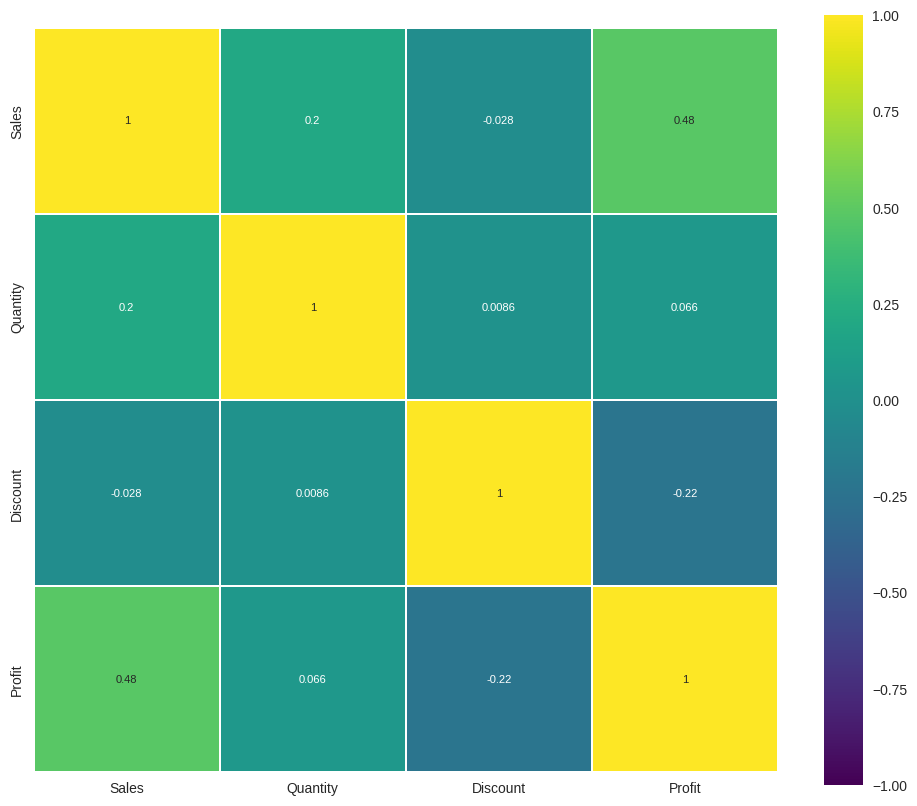

In [12]:
# prompt: graph correlation of all numerical variables
corr = df_num.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr,cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);


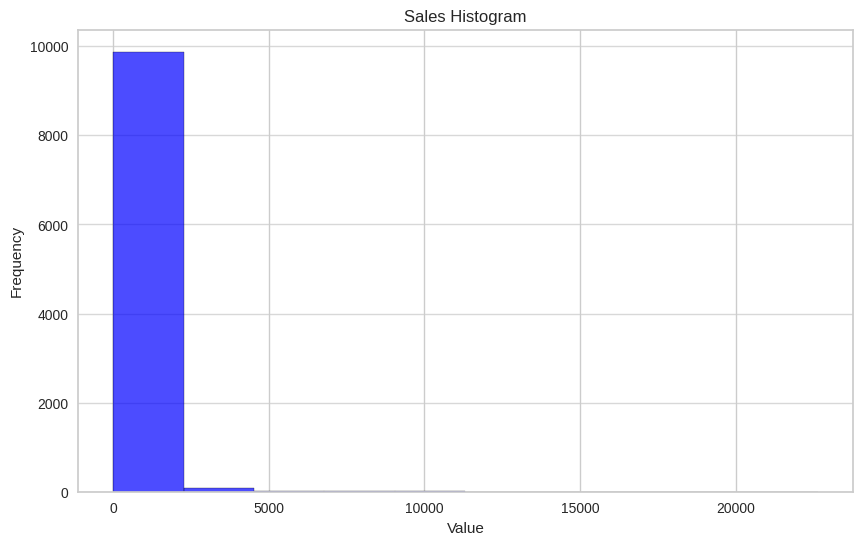

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Sales'], bins=10, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title('Sales Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

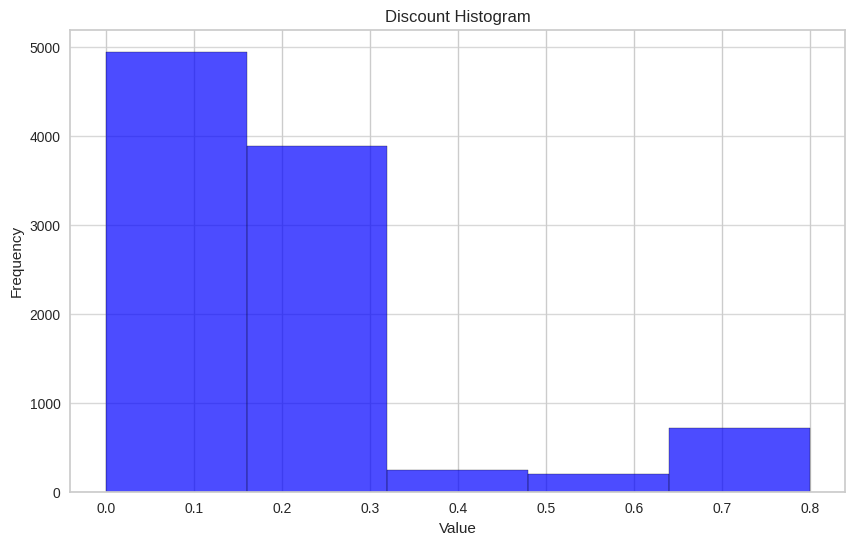

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Discount'], bins=5, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title('Discount Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

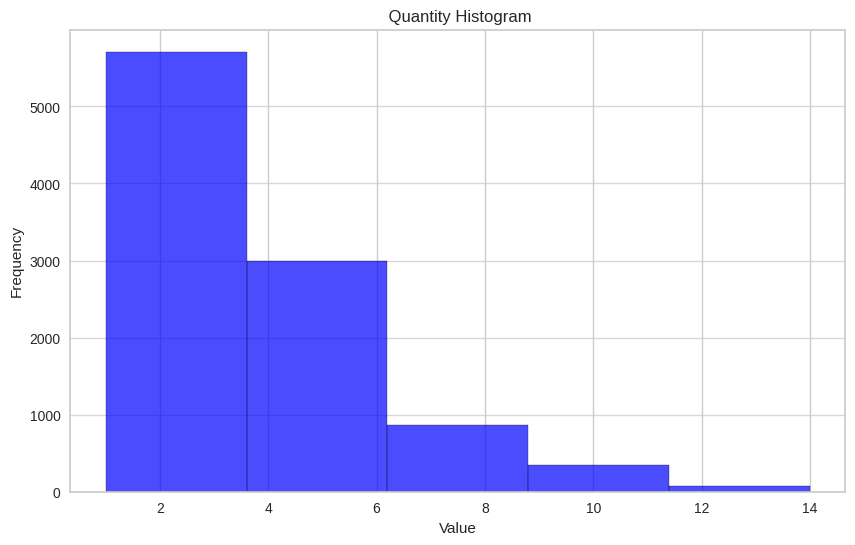

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Quantity'], bins=5, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title(' Quantity Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

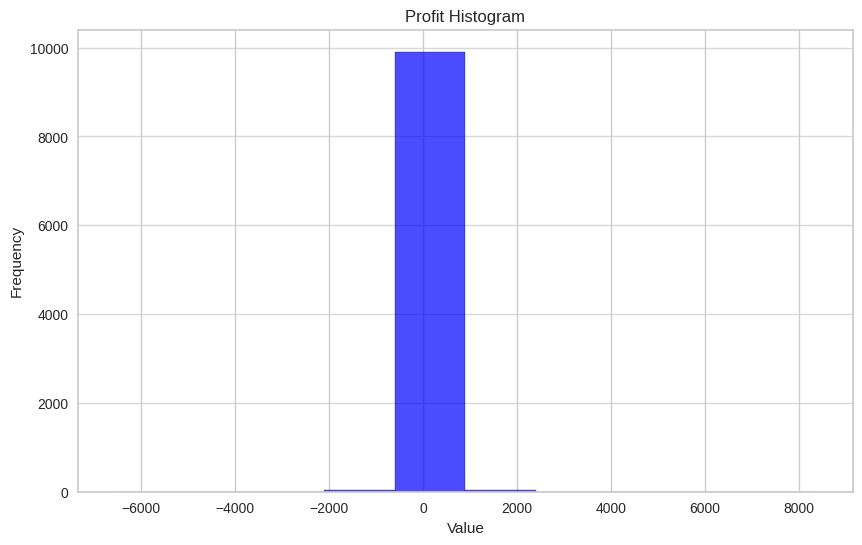

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Profit'], bins=10, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title('Profit Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

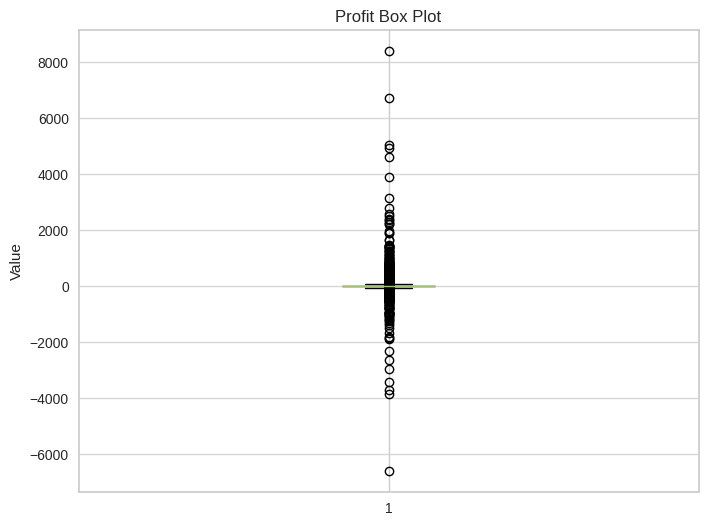

In [17]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_num['Profit'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Customize the plot
plt.title('Profit Box Plot')
plt.ylabel('Value')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

In [18]:
# Analysis of Categorical Variables
df.describe(include="object").T

,count,unique,top,freq
Order ID,9994,5009,CA-2017-100111,14
Order Date,9994,1237,9/5/2016,38
Ship Date,9994,1334,12/16/2015,35
Ship Mode,9994,4,Standard Class,5968
Customer ID,9994,793,WB-21850,37
Customer Name,9994,793,William Brown,37
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001


In [19]:
df['Country'].unique()

array(['United States'], dtype=object)

Converting into the appropriate datatypes

In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='mixed')
df['Ship Date']  = pd.to_datetime(df['Ship Date'],format='mixed')

In [21]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [22]:
df['Customer ID'].nunique(), df['Customer Name'].nunique()


(793, 793)

In [23]:
df['Postal Code'].nunique(), df['City'].nunique()

(631, 531)

In [24]:
df = df.drop(['Row ID', 'Customer Name', 'Postal Code', 'Country'], axis=1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [25]:
df.shape

(9994, 17)

## **2. Exploratory Data Analsysis EDA**

In [26]:
#identify customers with negative profit
df[df['Profit'] < 0].shape[0]

1871

In [27]:
percentage_neg_orders = (df[df['Profit'] < 0].shape[0] / df.shape[0]) * 100
print(f"Percentage of orders with negative profit: {percentage_neg_orders:.2f}%")

Percentage of orders with negative profit: 18.72%


In [28]:
# identify customer with the highest negative profit

negative_profit_customer = df[df['Profit'] == -6599.978000]['Customer ID'].unique()
print(f"Customer with negative profit: {negative_profit_customer}")


Customer with negative profit: ['CS-12505']


In [29]:
# Number orders by customer CS-12505

ord_negcustomer = df[df['Customer ID'] == 'CS-12505'].shape[0]
print(ord_negcustomer)

9


In [30]:
# display all 9 orders by the customer

df[df['Customer ID'] == 'CS-12505']


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1477,CA-2016-121958,2016-11-13,2016-11-17,Standard Class,CS-12505,Consumer,Thomasville,North Carolina,South,OFF-SU-10000381,Office Supplies,Supplies,Acme Forged Steel Scissors with Black Enamel H...,52.136,7,0.2,5.8653
1507,CA-2016-134208,2016-09-17,2016-09-23,Standard Class,CS-12505,Consumer,Columbus,Georgia,South,TEC-MA-10004458,Technology,Machines,Lexmark X 9575 Professional All-in-One Color P...,396.000,4,0.0,190.0800
2803,CA-2015-159380,2015-05-12,2015-05-16,Standard Class,CS-12505,Consumer,San Francisco,California,West,OFF-PA-10003893,Office Supplies,Paper,Xerox 1962,12.840,3,0.0,5.7780
2804,CA-2015-159380,2015-05-12,2015-05-16,Standard Class,CS-12505,Consumer,San Francisco,California,West,OFF-PA-10004239,Office Supplies,Paper,Xerox 1953,25.680,6,0.0,11.5560
6822,US-2017-115609,2017-11-02,2017-11-07,Standard Class,CS-12505,Consumer,Los Angeles,California,West,OFF-AP-10003040,Office Supplies,Appliances,Fellowes 8 Outlet Superior Workstation Surge P...,168.100,5,0.0,43.7060
7771,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Consumer,Lancaster,Ohio,East,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,456.588,2,0.7,-304.3920
7772,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Consumer,Lancaster,Ohio,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780
7773,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Consumer,Lancaster,Ohio,East,TEC-AC-10000926,Technology,Accessories,NETGEAR RangeMax WNR1000 Wireless Router,59.976,3,0.2,11.9952
9659,CA-2014-100860,2014-03-26,2014-03-30,Second Class,CS-12505,Consumer,Pomona,California,West,OFF-LA-10001982,Office Supplies,Labels,Smead Alpha-Z Color-Coded Name Labels First Le...,18.750,5,0.0,9.0000


In [31]:
# orders by date for customer
neg_cust_orders = df[df['Customer ID'] == 'CS-12505']
order_date_counts = neg_cust_orders.groupby('Order Date')['Order ID'].count()
print(order_date_counts)

Order Date
2014-03-26    1
2015-05-12    2
2016-09-17    1
2016-11-13    1
2016-11-25    3
2017-11-02    1
Name: Order ID, dtype: int64


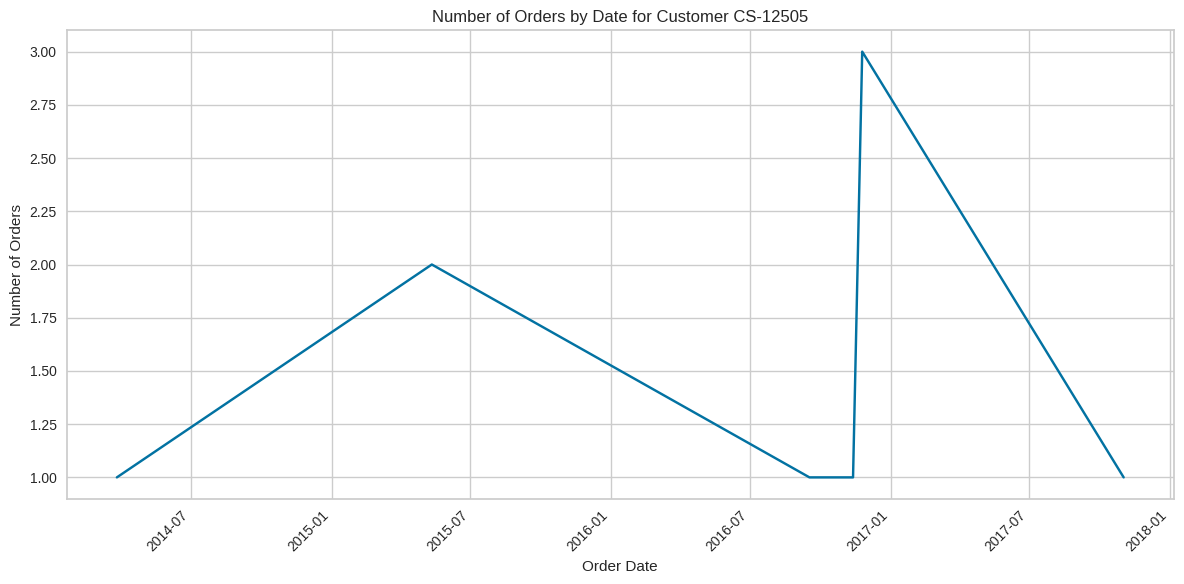

In [32]:
# graph all orders by date for customer
neg_cust_orders = df[df['Customer ID'] == 'CS-12505']
order_date_counts = neg_cust_orders.groupby('Order Date')['Order ID'].count()

plt.figure(figsize=(12, 6))
plt.plot(order_date_counts.index, order_date_counts.values)
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Date for Customer CS-12505')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [33]:
# group by customer the sales and profit

customer_sales_profit = df.groupby('Customer ID').agg({'Sales': 'sum', 'Profit': 'sum'})
print(customer_sales_profit)


                Sales     Profit
Customer ID                     
AA-10315     5563.560  -362.8825
AA-10375     1056.390   277.3824
AA-10480     1790.512   435.8274
AA-10645     5086.935   857.8033
AB-10015      886.156   129.3465
...               ...        ...
XP-21865     2374.658   621.2300
YC-21895     5454.350  1305.6290
YS-21880     6720.444  1778.2923
ZC-21910     8025.707 -1032.1490
ZD-21925     1493.944   249.1307

[793 rows x 2 columns]


In [34]:
# Orders and Itesm Sold per Region
orders_by_region = df.groupby('Region')['Order ID'].nunique().reset_index(name='count').sort_values(['count'],ascending=False)

items_by_region = df.groupby('Region')['Quantity'].sum().reset_index(name='items sold').sort_values(['items sold'],ascending=False)

orders_by_region['count'].sum(), items_by_region['items sold'].sum()

(5009, 37873)

In [35]:
print(orders_by_region)
print(items_by_region)

    Region  count
3     West   1611
1     East   1401
0  Central   1175
2    South    822
    Region  items sold
3     West       12266
1     East       10618
0  Central        8780
2    South        6209


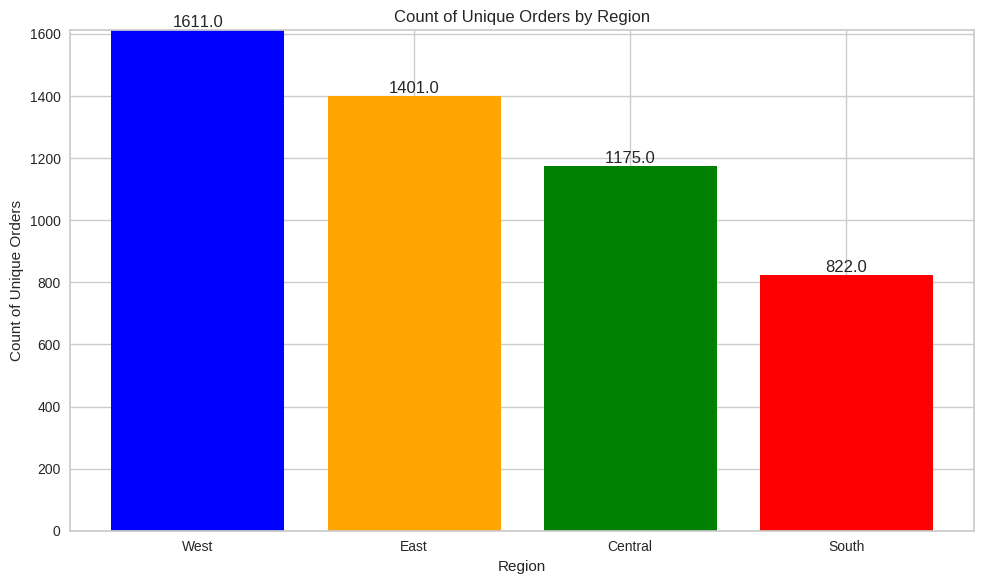

In [36]:
plt.figure(figsize=(10, 6))
bars = plt.bar(orders_by_region['Region'], orders_by_region['count'],
               color=['blue', 'orange', 'green', 'red'])

plt.title('Count of Unique Orders by Region')
plt.xlabel('Region')
plt.ylabel('Count of Unique Orders')
plt.ylim(0, max(orders_by_region['count']) + 0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [37]:
# Category level
orders_by_category = df.groupby('Category')['Order ID'].nunique().reset_index(name='count').sort_values(['count'],ascending=False)

items_by_category = df.groupby(['Category','Sub-Category'])['Quantity'].sum().reset_index(name='items sold').sort_values(['Category','items sold'],ascending=False)
print(orders_by_category['count'].sum(), items_by_category['items sold'].sum())

display(orders_by_category)
display(items_by_category)

7050 37873


,Category,count
1,Office Supplies,3742
0,Furniture,1764
2,Technology,1544


,Category,Sub-Category,items sold
16,Technology,Phones,3289
13,Technology,Accessories,2976
15,Technology,Machines,440
14,Technology,Copiers,234
6,Office Supplies,Binders,5974
10,Office Supplies,Paper,5178
11,Office Supplies,Storage,3158
5,Office Supplies,Art,3000
4,Office Supplies,Appliances,1729
9,Office Supplies,Labels,1400


In [38]:
items_by_category.dtypes

,0
Category,object
Sub-Category,object
items sold,int64


In [39]:
items_by_category['All'] = 'All'

fig = px.treemap(items_by_category,path=['All','Category','Sub-Category'],values='items sold',width=950,height=700);
fig.update_layout(title_text='Total Items Sold by Category',title_x=0.5,title_font=dict(size=25));
fig.update_layout(margin=dict(t=50,l=25,r=25,b=25),paper_bgcolor="black",font=dict(color="white",size=18));
fig.data[0].textinfo = 'label+value+percent parent'

plt.tight_layout();
fig.show();

<Figure size 800x550 with 0 Axes>

In [40]:
category_by_regions = df.groupby(['Category','Region'])['Quantity'].sum().reset_index(name='items sold').sort_values(['Region','items sold'],ascending=False)

print(category_by_regions)

category_by_regions['items sold'].sum(), df['Quantity'].sum()


           Category   Region  items sold
7   Office Supplies     West        7235
3         Furniture     West        2696
11       Technology     West        2335
6   Office Supplies    South        3800
2         Furniture    South        1291
10       Technology    South        1118
5   Office Supplies     East        6462
1         Furniture     East        2214
9        Technology     East        1942
4   Office Supplies  Central        5409
0         Furniture  Central        1827
8        Technology  Central        1544


(37873, 37873)

In [41]:
category_by_regions['All'] = 'All'

fig = px.treemap(category_by_regions,path=['All','Region','Category'],values='items sold',width=950,height=700);
fig.update_layout(title_text='Total Items Sold by Category and Region',title_x=0.5,title_font=dict(size=25));
fig.update_layout(margin=dict(t=50,l=25,r=25,b=25),paper_bgcolor="black",font=dict(color="white",size=18));
fig.data[0].textinfo = 'label+value+percent parent'

plt.tight_layout()
fig.show()

<Figure size 800x550 with 0 Axes>

In [42]:

products_by_items = df.groupby('Product Name')['Quantity'].sum().reset_index(name='items sold').sort_values(['items sold'],ascending=False)
total_items = df['Quantity'].sum()
products_by_items['percentage'] = (products_by_items['items sold'] / total_items) * 100
print(products_by_items.head(10))


                                           Product Name  items sold  \
1499                                            Staples         215   
1493                                    Staple envelope         170   
537                                   Easy-staple paper         150   
1500                            Staples in misc. colors          86   
942                          KI Adjustable-Height Table          74   
259                             Avery Non-Stick Binders          71   
1511                            Storex Dura Pro Binders          71   
699   GBC Premium Transparent Covers with Diagonal L...          67   
1450         Situations Contoured Folding Chairs, 4/Set          64   
1497                         Staple-based wall hangings          62   

      percentage  
1499    0.567687  
1493    0.448869  
537     0.396061  
1500    0.227075  
942     0.195390  
259     0.187469  
1511    0.187469  
699     0.176907  
1450    0.168986  
1497    0.163705  


In [43]:
print('average discount = {:.1f}%.'.format(df['Discount'].mean() * 100))

average discount = 15.6%.


In [44]:
df["year"]  = df["Order Date"].dt.year
discount_by_year = (df.groupby('year')['Discount'].mean() * 100).reset_index(name='avg discount').sort_values(['year'],ascending=True)
print(discount_by_year)

   year  avg discount
0  2014     15.828399
1  2015     15.560894
2  2016     15.474295
3  2017     15.646739


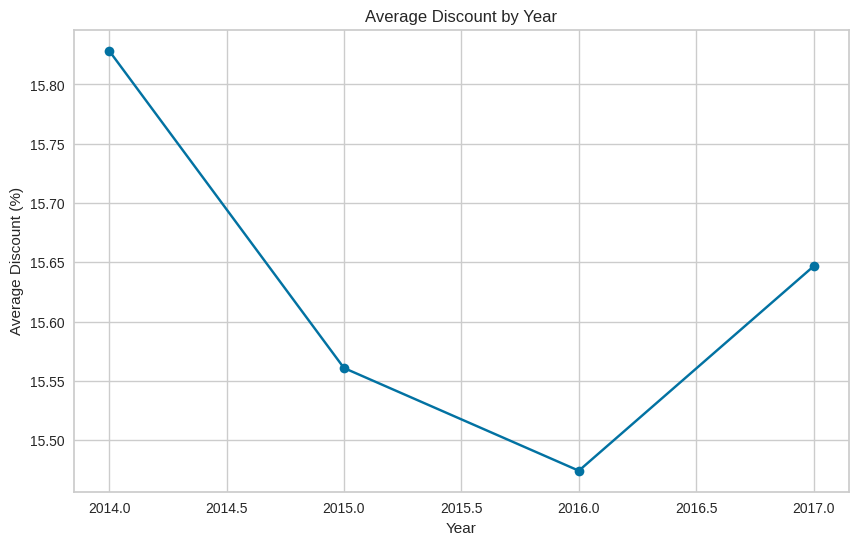

In [45]:
# generate plot for discount

plt.figure(figsize=(10, 6))
plt.plot(discount_by_year['year'], discount_by_year['avg discount'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Discount (%)')
plt.title('Average Discount by Year')
plt.grid(True)
plt.show()


## **3. Feature Engineering and Segmentation by Clustering**

**Segmentation by Region **
Hypothesis: Customer profit behavior can be explained by 3 region segments

In [46]:
df_region = df[['Region', 'Profit']]
print(df_region.head(10))

  Region    Profit
0  South   41.9136
1  South  219.5820
2   West    6.8714
3  South -383.0310
4  South    2.5164
5   West   14.1694
6   West    1.9656
7   West   90.7152
8   West    5.7825
9   West   34.4700


In [47]:
df_encodedr = pd.get_dummies(df_region, columns=['Region'])
print(df_encodedr.head(10))



     Profit  Region_Central  Region_East  Region_South  Region_West
0   41.9136           False        False          True        False
1  219.5820           False        False          True        False
2    6.8714           False        False         False         True
3 -383.0310           False        False          True        False
4    2.5164           False        False          True        False
5   14.1694           False        False         False         True
6    1.9656           False        False         False         True
7   90.7152           False        False         False         True
8    5.7825           False        False         False         True
9   34.4700           False        False         False         True


In [48]:
features = df_encodedr[['Profit'] + list(df_encodedr.columns[df_encodedr.columns.str.startswith('Region_')])]
print(features.head(10))

     Profit  Region_Central  Region_East  Region_South  Region_West
0   41.9136           False        False          True        False
1  219.5820           False        False          True        False
2    6.8714           False        False         False         True
3 -383.0310           False        False          True        False
4    2.5164           False        False          True        False
5   14.1694           False        False         False         True
6    1.9656           False        False         False         True
7   90.7152           False        False         False         True
8    5.7825           False        False         False         True
9   34.4700           False        False         False         True


In [49]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_region['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(scaled_features, df_region['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.68264360593351


In [50]:
df_region.head(15)

,Region,Profit,Cluster
0,South,41.9136,1
1,South,219.5820,1
2,West,6.8714,1
3,South,-383.0310,1
4,South,2.5164,1
5,West,14.1694,1
6,West,1.9656,1
7,West,90.7152,1
8,West,5.7825,1
9,West,34.4700,1


In [51]:
cluster_analysis = df_region.groupby('Cluster').agg({'Profit': 'mean'})
print(cluster_analysis)

            Profit
Cluster           
0        32.135808
1        32.172482
2        17.092709


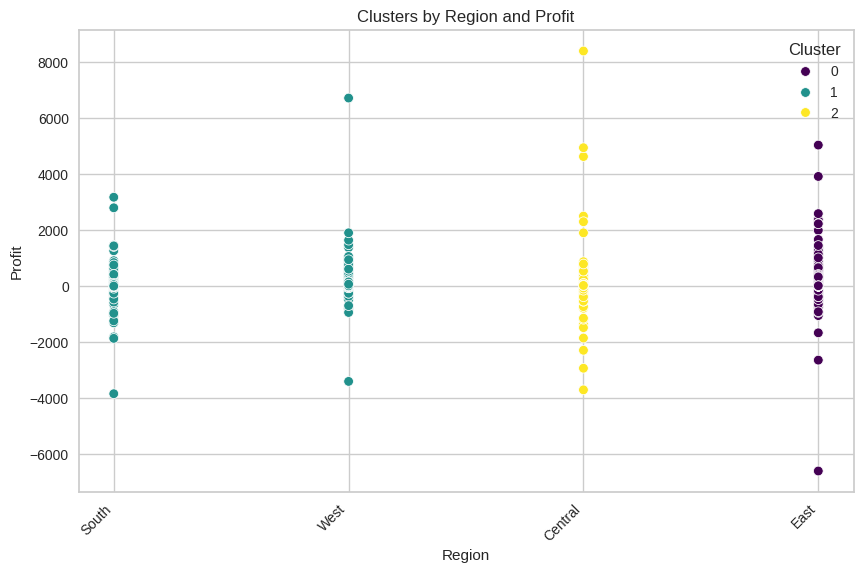

In [52]:
# visualize the clusters by profit and Regions
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Region', y='Profit', hue='Cluster', data=df_region, palette='viridis')
plt.title('Clusters by Region and Profit')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.show()



In [53]:
#ohe = OneHotEncoder(sparse=False)
#encoded_data = ohe.fit_transform(df

dfregion = df_region.copy()

dfregion.drop(['Cluster'],axis=1,inplace=True)

dfregion.head()

,Region,Profit
0,South,41.9136
1,South,219.5820
2,West,6.8714
3,South,-383.0310
4,South,2.5164


In [54]:
ohe = OneHotEncoder()
encoded_data = ohe.fit_transform(dfregion[['Region']])
encoded_rdf = pd.DataFrame(encoded_data.toarray(), columns=ohe.get_feature_names_out(['Region']))
print(encoded_rdf.head())

   Region_Central  Region_East  Region_South  Region_West
0             0.0          0.0           1.0          0.0
1             0.0          0.0           1.0          0.0
2             0.0          0.0           0.0          1.0
3             0.0          0.0           1.0          0.0
4             0.0          0.0           1.0          0.0


In [55]:
encoded_rdf['Profit'] = dfregion['Profit']
print(encoded_rdf.head())

   Region_Central  Region_East  Region_South  Region_West    Profit
0             0.0          0.0           1.0          0.0   41.9136
1             0.0          0.0           1.0          0.0  219.5820
2             0.0          0.0           0.0          1.0    6.8714
3             0.0          0.0           1.0          0.0 -383.0310
4             0.0          0.0           1.0          0.0    2.5164


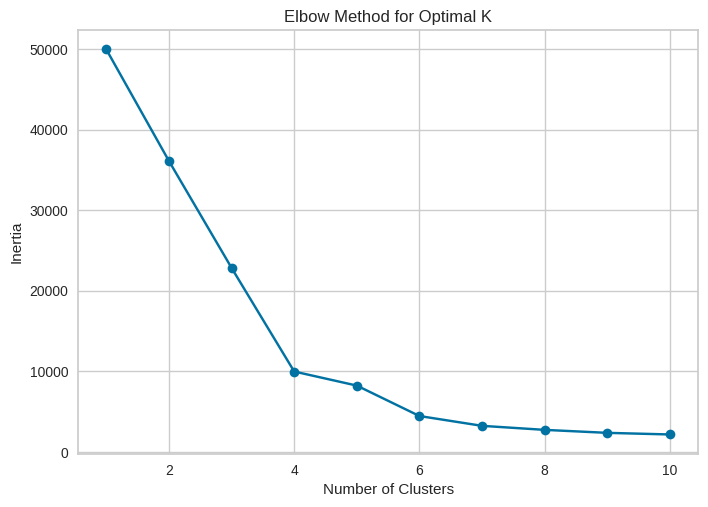

In [56]:
# Standardize the encoded data
scaler = StandardScaler()
scaled_encodedf = scaler.fit_transform(encoded_rdf)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_encodedf)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()



In [57]:

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
dfregion['Cluster'] = kmeans.fit_predict(scaled_encodedf)

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(scaled_encodedf, dfregion['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.8827678743286128


In [58]:
dfregion.dtypes

,0
Region,object
Profit,float64
Cluster,int32


In [59]:
ocluster_analysis = dfregion.groupby('Cluster').agg({'Profit': 'mean'})
print(ocluster_analysis)

            Profit
Cluster           
0        32.135808
1        33.849032
2        17.092709
3        28.857673


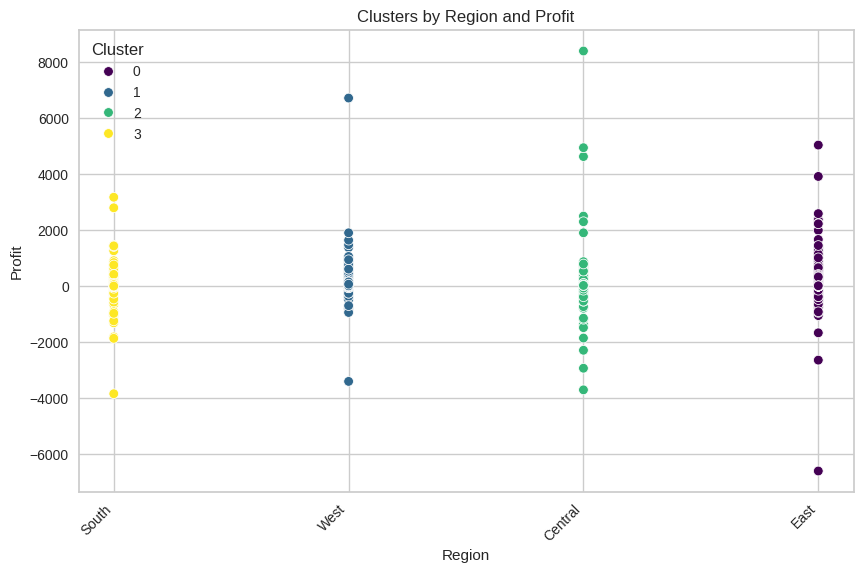

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Region', y='Profit', hue='Cluster', data=dfregion, palette='viridis')
plt.title('Clusters by Region and Profit')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.show()

In [61]:
# Available features from clean dataframe
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Segment', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'year'],
      dtype='object')

Segmentation by CLV (Customer Lifetime Value)

In [62]:
df_clv = df[['Customer ID', 'Sales', 'Profit','Order Date', 'Ship Date','Order ID','Segment']]
print(df_clv.head())

  Customer ID     Sales    Profit Order Date  Ship Date        Order ID  \
0    CG-12520  261.9600   41.9136 2016-11-08 2016-11-11  CA-2016-152156   
1    CG-12520  731.9400  219.5820 2016-11-08 2016-11-11  CA-2016-152156   
2    DV-13045   14.6200    6.8714 2016-06-12 2016-06-16  CA-2016-138688   
3    SO-20335  957.5775 -383.0310 2015-10-11 2015-10-18  US-2015-108966   
4    SO-20335   22.3680    2.5164 2015-10-11 2015-10-18  US-2015-108966   

     Segment  
0   Consumer  
1   Consumer  
2  Corporate  
3   Consumer  
4   Consumer  


In [63]:
# Need to create a new Feature "Lifespan"

# Calculate the lifespan for each customer
customer_lifespan = df_clv.groupby('Customer ID').agg({'Order Date': ['min', 'max']})
customer_lifespan.columns = ['FirstOrder', 'LastOrder']

# Calculate lifespan in days
customer_lifespan['LifespanDays'] = (customer_lifespan['LastOrder'] - customer_lifespan['FirstOrder']).dt.days

# Optionally convert lifespan to years
customer_lifespan['LifespanYears'] = customer_lifespan['LifespanDays'] / 365

print(customer_lifespan)

            FirstOrder  LastOrder  LifespanDays  LifespanYears
Customer ID                                                   
AA-10315    2014-03-31 2017-06-29          1186       3.249315
AA-10375    2014-04-21 2017-12-11          1330       3.643836
AA-10480    2014-05-04 2017-04-15          1077       2.950685
AA-10645    2014-06-22 2017-11-05          1232       3.375342
AB-10015    2014-02-18 2016-11-10           996       2.728767
...                ...        ...           ...            ...
XP-21865    2014-01-20 2017-11-17          1397       3.827397
YC-21895    2014-11-17 2017-12-26          1135       3.109589
YS-21880    2015-01-12 2017-12-21          1074       2.942466
ZC-21910    2014-10-13 2017-11-06          1120       3.068493
ZD-21925    2014-08-27 2017-06-11          1019       2.791781

[793 rows x 4 columns]


In [64]:
# Sorting Customers by highest Lifespan
customer_lifespan.head(10).sort_values(['LifespanYears'],ascending=False)

,FirstOrder,LastOrder,LifespanDays,LifespanYears
Customer ID,,,,
AB-10150,2014-03-05,2017-11-19,1355,3.712329
AA-10375,2014-04-21,2017-12-11,1330,3.643836
AA-10645,2014-06-22,2017-11-05,1232,3.375342
AA-10315,2014-03-31,2017-06-29,1186,3.249315
AB-10165,2014-11-16,2017-12-05,1115,3.054795
AB-10255,2014-07-22,2017-07-17,1091,2.989041
AA-10480,2014-05-04,2017-04-15,1077,2.950685
AB-10105,2014-12-20,2017-11-19,1065,2.917808
AB-10015,2014-02-18,2016-11-10,996,2.728767


In [65]:
# Merging New Feature to existing dataframe
df_clv = pd.merge(df_clv, customer_lifespan, on='Customer ID', how='left')
df_clv.head()

,Customer ID,Sales,Profit,Order Date,Ship Date,Order ID,Segment,FirstOrder,LastOrder,LifespanDays,LifespanYears
0,CG-12520,261.9600,41.9136,2016-11-08,2016-11-11,CA-2016-152156,Consumer,2015-10-15,2017-01-26,469,1.284932
1,CG-12520,731.9400,219.5820,2016-11-08,2016-11-11,CA-2016-152156,Consumer,2015-10-15,2017-01-26,469,1.284932
2,DV-13045,14.6200,6.8714,2016-06-12,2016-06-16,CA-2016-138688,Corporate,2016-06-12,2017-12-11,547,1.498630
3,SO-20335,957.5775,-383.0310,2015-10-11,2015-10-18,US-2015-108966,Consumer,2015-10-11,2017-12-01,782,2.142466
4,SO-20335,22.3680,2.5164,2015-10-11,2015-10-18,US-2015-108966,Consumer,2015-10-11,2017-12-01,782,2.142466


In [66]:
# Calculate total sales for each customer
customer_sales = df_clv.groupby('Customer ID')['Sales'].sum()

# Calculate average order value (AOV)
aov = customer_sales / df_clv.groupby('Customer ID').size()

# Assume a purchase frequency (PF) and average customer lifespan (ACL)
pf = df_clv.groupby('Customer ID').size().mean()
acl = df_clv.groupby('Customer ID')['LifespanYears'].mean()

# Calculate CLV
clv = aov * pf * acl

# Create a new DataFrame with CLV
clv_df = pd.DataFrame({'Customer ID': clv.index, 'CLV': clv.values})

clv_df.head()

,Customer ID,CLV
0,AA-10315,20711.810944
1,AA-10375,3234.133602
2,AA-10480,5548.620046
3,AA-10645,12021.749781
4,AB-10015,5079.156139


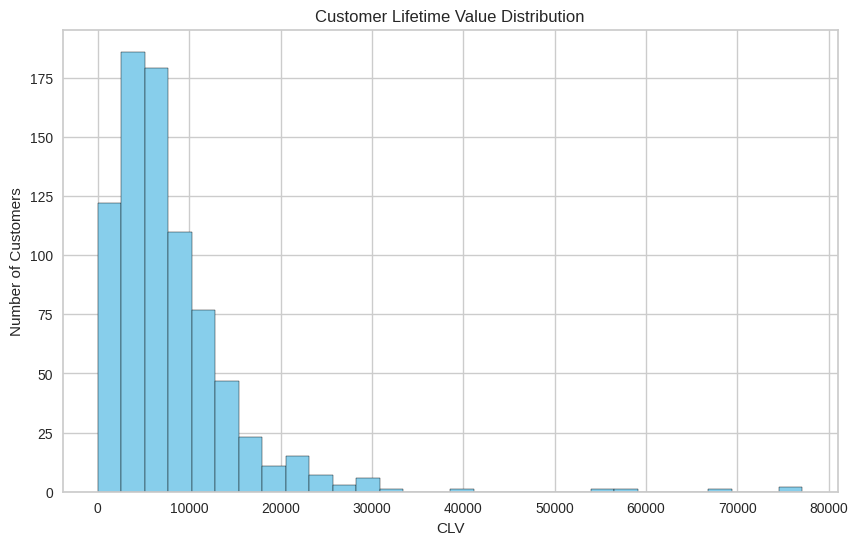

In [67]:
# Plotting the CLV distribution
plt.figure(figsize=(10, 6))
plt.hist(clv_df['CLV'], bins=30, color='skyblue', edgecolor='black')
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('CLV')
plt.ylabel('Number of Customers')
plt.show()

In [68]:
scaler = StandardScaler()
scaled_clv =scaler.fit_transform(clv_df[['CLV']])
print(scaled_clv)

[[ 1.73504928e+00]
 [-6.36947275e-01]
 [-3.22834949e-01]
 [ 5.55670881e-01]
 [-3.86548608e-01]
 [ 4.98990848e-01]
 [ 2.53572390e+00]
 [-5.64355798e-01]
 [-6.60177438e-01]
 [-7.41906538e-01]
 [-1.09814446e-01]
 [-1.77839594e-01]
 [ 2.21963908e+00]
 [-5.26873151e-01]
 [-6.18975034e-01]
 [ 1.56642616e+00]
 [-6.46579661e-01]
 [-5.48136645e-01]
 [-1.68972449e-01]
 [-6.53553621e-01]
 [-9.01731768e-01]
 [-9.30270506e-01]
 [-5.43116319e-01]
 [-7.77378928e-01]
 [-1.26498216e-01]
 [-8.96334174e-01]
 [ 9.17338608e-02]
 [-8.28955725e-02]
 [-2.33588940e-01]
 [-4.65413653e-01]
 [-1.68333808e-01]
 [ 8.65866624e-01]
 [ 1.84098068e-01]
 [-2.86844202e-01]
 [ 4.63788228e-01]
 [ 4.38082030e-01]
 [ 1.01490386e+00]
 [ 8.92991505e-02]
 [ 5.57657833e-02]
 [-4.10061612e-01]
 [-7.09363039e-01]
 [ 1.23331553e-01]
 [-1.07587023e+00]
 [-5.27478829e-01]
 [-5.09671548e-01]
 [-1.01311738e-01]
 [ 5.09381406e-01]
 [-8.41114332e-01]
 [ 2.79504018e+00]
 [-1.07587023e+00]
 [ 9.14962586e-01]
 [ 5.88136099e-01]
 [-3.6379343

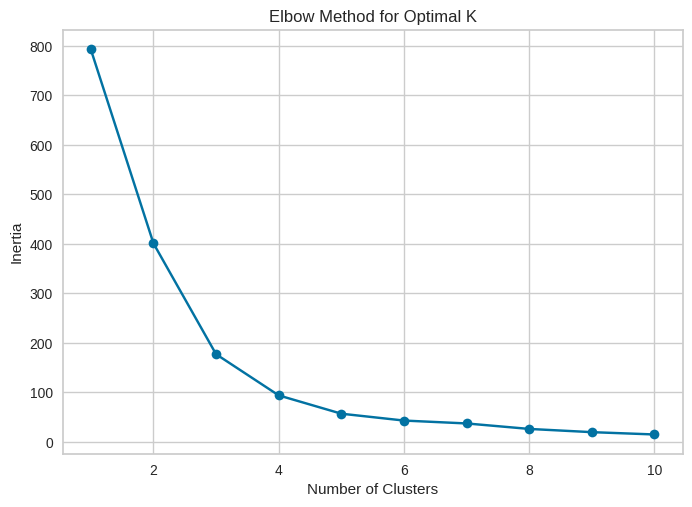

In [69]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_clv)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


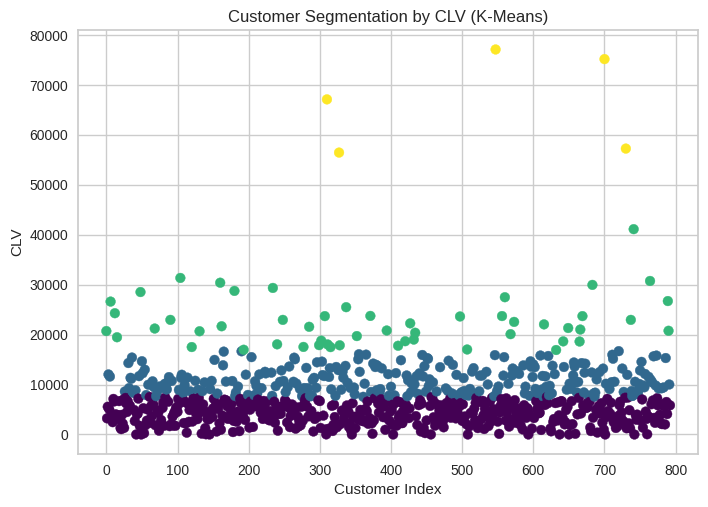

In [70]:
kmeans = KMeans(n_clusters=4, random_state=42)
clv_df['Cluster_KMeans'] = kmeans.fit_predict(scaled_clv)

plt.scatter(clv_df.index, clv_df['CLV'], c=clv_df['Cluster_KMeans'], cmap='viridis')
plt.title('Customer Segmentation by CLV (K-Means)')
plt.xlabel('Customer Index')
plt.ylabel('CLV')
plt.show()

In [71]:
print(clv_df.index)

RangeIndex(start=0, stop=793, step=1)


Segmentation by Discount

In [72]:
# Select Variables for Discount dataframe
df_discount = df[['Customer ID', 'Sales', 'Profit','Order Date', 'Discount','Segment','Region']]
print(df_discount.head())

  Customer ID     Sales    Profit Order Date  Discount    Segment Region
0    CG-12520  261.9600   41.9136 2016-11-08      0.00   Consumer  South
1    CG-12520  731.9400  219.5820 2016-11-08      0.00   Consumer  South
2    DV-13045   14.6200    6.8714 2016-06-12      0.00  Corporate   West
3    SO-20335  957.5775 -383.0310 2015-10-11      0.45   Consumer  South
4    SO-20335   22.3680    2.5164 2015-10-11      0.20   Consumer  South


In [73]:
# merging lifespan into dataframe
df_discount = pd.merge(df_discount, customer_lifespan, on='Customer ID', how='left')
df_discount.head()

,Customer ID,Sales,Profit,Order Date,Discount,Segment,Region,FirstOrder,LastOrder,LifespanDays,LifespanYears
0,CG-12520,261.9600,41.9136,2016-11-08,0.00,Consumer,South,2015-10-15,2017-01-26,469,1.284932
1,CG-12520,731.9400,219.5820,2016-11-08,0.00,Consumer,South,2015-10-15,2017-01-26,469,1.284932
2,DV-13045,14.6200,6.8714,2016-06-12,0.00,Corporate,West,2016-06-12,2017-12-11,547,1.498630
3,SO-20335,957.5775,-383.0310,2015-10-11,0.45,Consumer,South,2015-10-11,2017-12-01,782,2.142466
4,SO-20335,22.3680,2.5164,2015-10-11,0.20,Consumer,South,2015-10-11,2017-12-01,782,2.142466


In [74]:
df_discount.describe()

,Sales,Profit,Order Date,Discount,FirstOrder,LastOrder,LifespanDays,LifespanYears
count,9994.000000,9994.000000,9994,9994.000000,9994,9994,9994.000000,9994.000000
mean,229.858001,28.656896,2016-04-30 00:07:12.259355648,0.156203,2014-10-04 09:28:59.843906304,2017-08-31 17:15:15.669401600,1062.323794,2.910476
min,0.444000,-6599.978000,2014-01-03 00:00:00,0.000000,2014-01-03 00:00:00,2014-10-22 00:00:00,0.000000,0.000000
25%,17.280000,1.728750,2015-05-23 00:00:00,0.000000,2014-04-30 00:00:00,2017-08-06 00:00:00,933.500000,2.557534
50%,54.490000,8.666500,2016-06-26 00:00:00,0.200000,2014-08-23 00:00:00,2017-10-31 00:00:00,1125.000000,3.082192
75%,209.940000,29.364000,2017-05-14 00:00:00,0.200000,2014-12-05 00:00:00,2017-12-02 00:00:00,1242.000000,3.402740
max,22638.480000,8399.976000,2017-12-30 00:00:00,0.800000,2017-11-05 00:00:00,2017-12-30 00:00:00,1440.000000,3.945205
std,623.245101,234.260108,NaN,0.206452,NaN,NaN,258.291481,0.707648


In [78]:
customer_discount_lifespan = df_discount.groupby(['Region','Discount'])['LifespanYears'].agg(['mean'])
print(customer_discount_lifespan)


                      mean
Region  Discount          
Central 0.00      2.911138
        0.10      2.873516
        0.20      2.883335
        0.30      2.982686
        0.32      2.692440
        0.40      2.918230
        0.50      2.898935
        0.60      2.900893
        0.80      2.914347
East    0.00      2.871655
        0.10      2.855984
        0.20      2.834072
        0.30      2.992911
        0.40      2.873694
        0.50      2.968493
        0.70      2.880704
South   0.00      2.944188
        0.20      2.892087
        0.40      3.090240
        0.45      2.686177
        0.50      3.384247
        0.70      2.909361
West    0.00      2.958106
        0.15      3.182877
        0.20      2.932770
        0.50      2.977778
        0.70      2.922932


In [75]:
# Extracting Discount for Scaling purposes
df_d = df_discount['Discount']
df_d.head()

,Discount
0,0.00
1,0.00
2,0.00
3,0.45
4,0.20


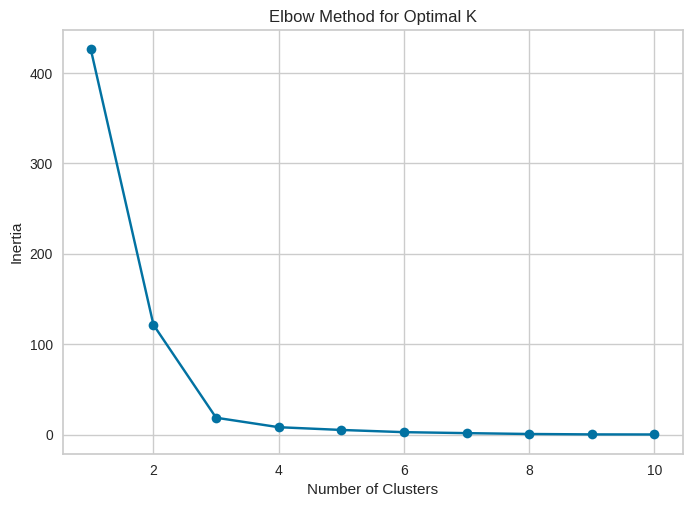

In [79]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_d.values.reshape(-1, 1)) #passing as 2D array
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

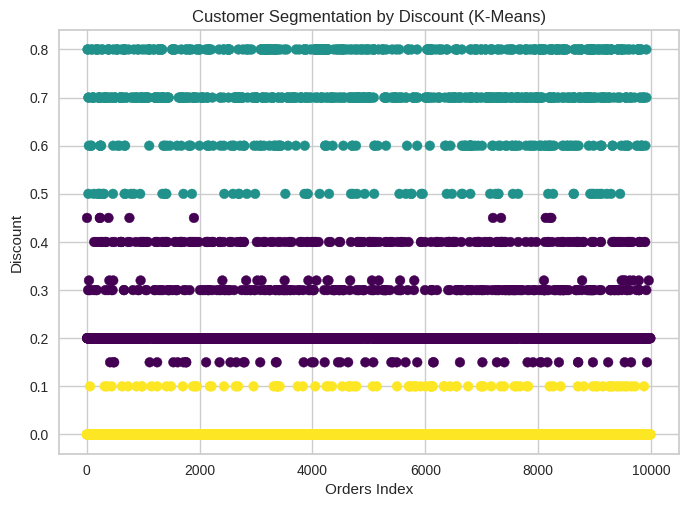

In [80]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_discount['Cluster_KMeans'] = kmeans.fit_predict(df_d.values.reshape(-1, 1))

plt.scatter(df_discount.index, df_discount['Discount'], c=df_discount['Cluster_KMeans'], cmap='viridis')
plt.title('Customer Segmentation by Discount (K-Means)')
plt.xlabel('Orders Index')
plt.ylabel('Discount')
plt.show()

In [82]:
df_discount.head(). sort_values(['LifespanYears'], ascending = False)

,Customer ID,Sales,Profit,Order Date,Discount,Segment,Region,FirstOrder,LastOrder,LifespanDays,LifespanYears,Cluster_KMeans
3,SO-20335,957.5775,-383.0310,2015-10-11,0.45,Consumer,South,2015-10-11,2017-12-01,782,2.142466,0
4,SO-20335,22.3680,2.5164,2015-10-11,0.20,Consumer,South,2015-10-11,2017-12-01,782,2.142466,0
2,DV-13045,14.6200,6.8714,2016-06-12,0.00,Corporate,West,2016-06-12,2017-12-11,547,1.498630,2
0,CG-12520,261.9600,41.9136,2016-11-08,0.00,Consumer,South,2015-10-15,2017-01-26,469,1.284932,2
1,CG-12520,731.9400,219.5820,2016-11-08,0.00,Consumer,South,2015-10-15,2017-01-26,469,1.284932,2


## **3. Segment Analysis**

CLV Customer Analysis

In [83]:
# Prepare Dataframe
dfclv = df_clv.copy()
dfclv.drop(['FirstOrder','LastOrder','LifespanDays','LifespanYears'],axis=1,inplace=True)
dfclv.head()


,Customer ID,Sales,Profit,Order Date,Ship Date,Order ID,Segment
0,CG-12520,261.9600,41.9136,2016-11-08,2016-11-11,CA-2016-152156,Consumer
1,CG-12520,731.9400,219.5820,2016-11-08,2016-11-11,CA-2016-152156,Consumer
2,DV-13045,14.6200,6.8714,2016-06-12,2016-06-16,CA-2016-138688,Corporate
3,SO-20335,957.5775,-383.0310,2015-10-11,2015-10-18,US-2015-108966,Consumer
4,SO-20335,22.3680,2.5164,2015-10-11,2015-10-18,US-2015-108966,Consumer


In [84]:
# Create Merge CLV into Customer Dataframe
dfclv = pd.merge(dfclv, clv_df, on='Customer ID', how='left')
dfclv.head()

,Customer ID,Sales,Profit,Order Date,Ship Date,Order ID,Segment,CLV,Cluster_KMeans
0,CG-12520,261.9600,41.9136,2016-11-08,2016-11-11,CA-2016-152156,Consumer,3720.600137,0
1,CG-12520,731.9400,219.5820,2016-11-08,2016-11-11,CA-2016-152156,Consumer,3720.600137,0
2,DV-13045,14.6200,6.8714,2016-06-12,2016-06-16,CA-2016-138688,Corporate,2349.284499,0
3,SO-20335,957.5775,-383.0310,2015-10-11,2015-10-18,US-2015-108966,Consumer,4684.811536,0
4,SO-20335,22.3680,2.5164,2015-10-11,2015-10-18,US-2015-108966,Consumer,4684.811536,0


In [85]:
avg_clv_clusters = (dfclv.groupby('Cluster_KMeans')['CLV'].mean() * 100).reset_index(name='average clv').sort_values(['average clv'],ascending=False)
print(avg_clv_clusters)


   Cluster_KMeans   average clv
3               3  6.566518e+06
2               2  2.248923e+06
1               1  1.093247e+06
0               0  4.471659e+05


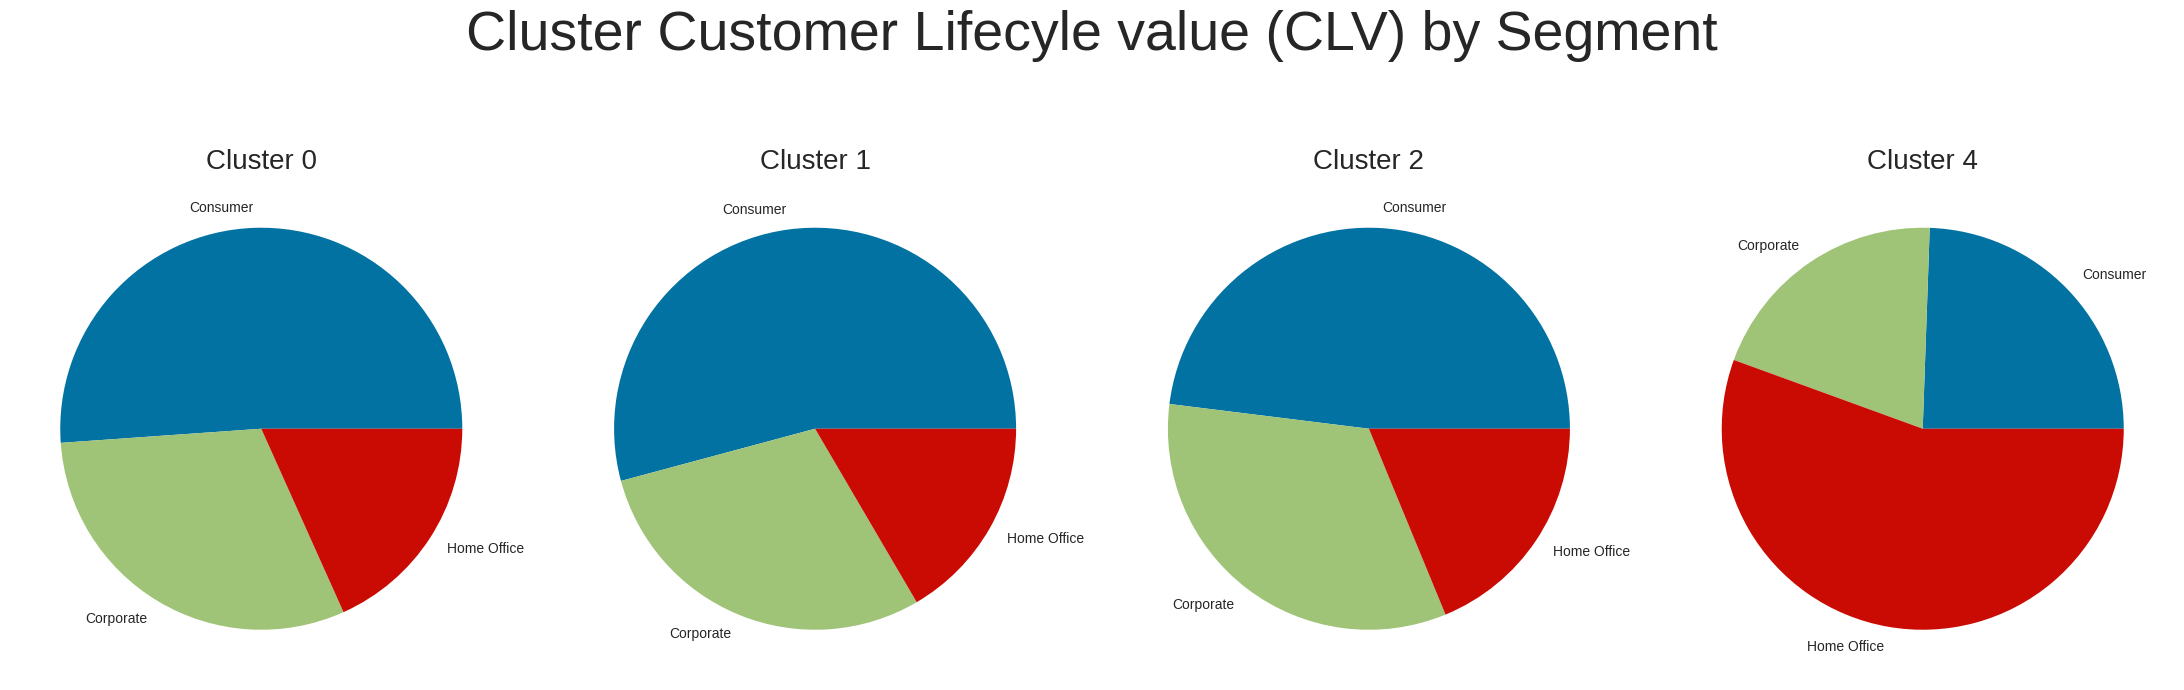

In [86]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(22,8))

dfclv[dfclv['Cluster_KMeans'] == 0].groupby('Segment').size().plot(kind='pie', ax=ax1)
dfclv[dfclv['Cluster_KMeans'] == 1].groupby('Segment').size().plot(kind='pie', ax=ax2)
dfclv[dfclv['Cluster_KMeans'] == 2].groupby('Segment').size().plot(kind='pie', ax=ax3)
dfclv[dfclv['Cluster_KMeans'] == 3].groupby('Segment').size().plot(kind='pie', ax=ax4)


ax1.set_title('Cluster 0',size=20)
ax2.set_title('Cluster 1',size=20)
ax3.set_title('Cluster 2',size=20)
ax4.set_title('Cluster 4',size=20)

fig.suptitle("Cluster Customer Lifecyle value (CLV) by Segment",fontsize=40)
plt.tight_layout()

plt.show()

Discount Customer Segment Analysis

In [87]:
avg_discount_clusters = (df_discount.groupby('Cluster_KMeans')['Discount'].mean() * 100).reset_index(name='average discount').sort_values(['average discount'],ascending=False)
print(avg_discount_clusters)


   Cluster_KMeans  average discount
1               1         70.325380
0               0         21.609809
2               2          0.192150


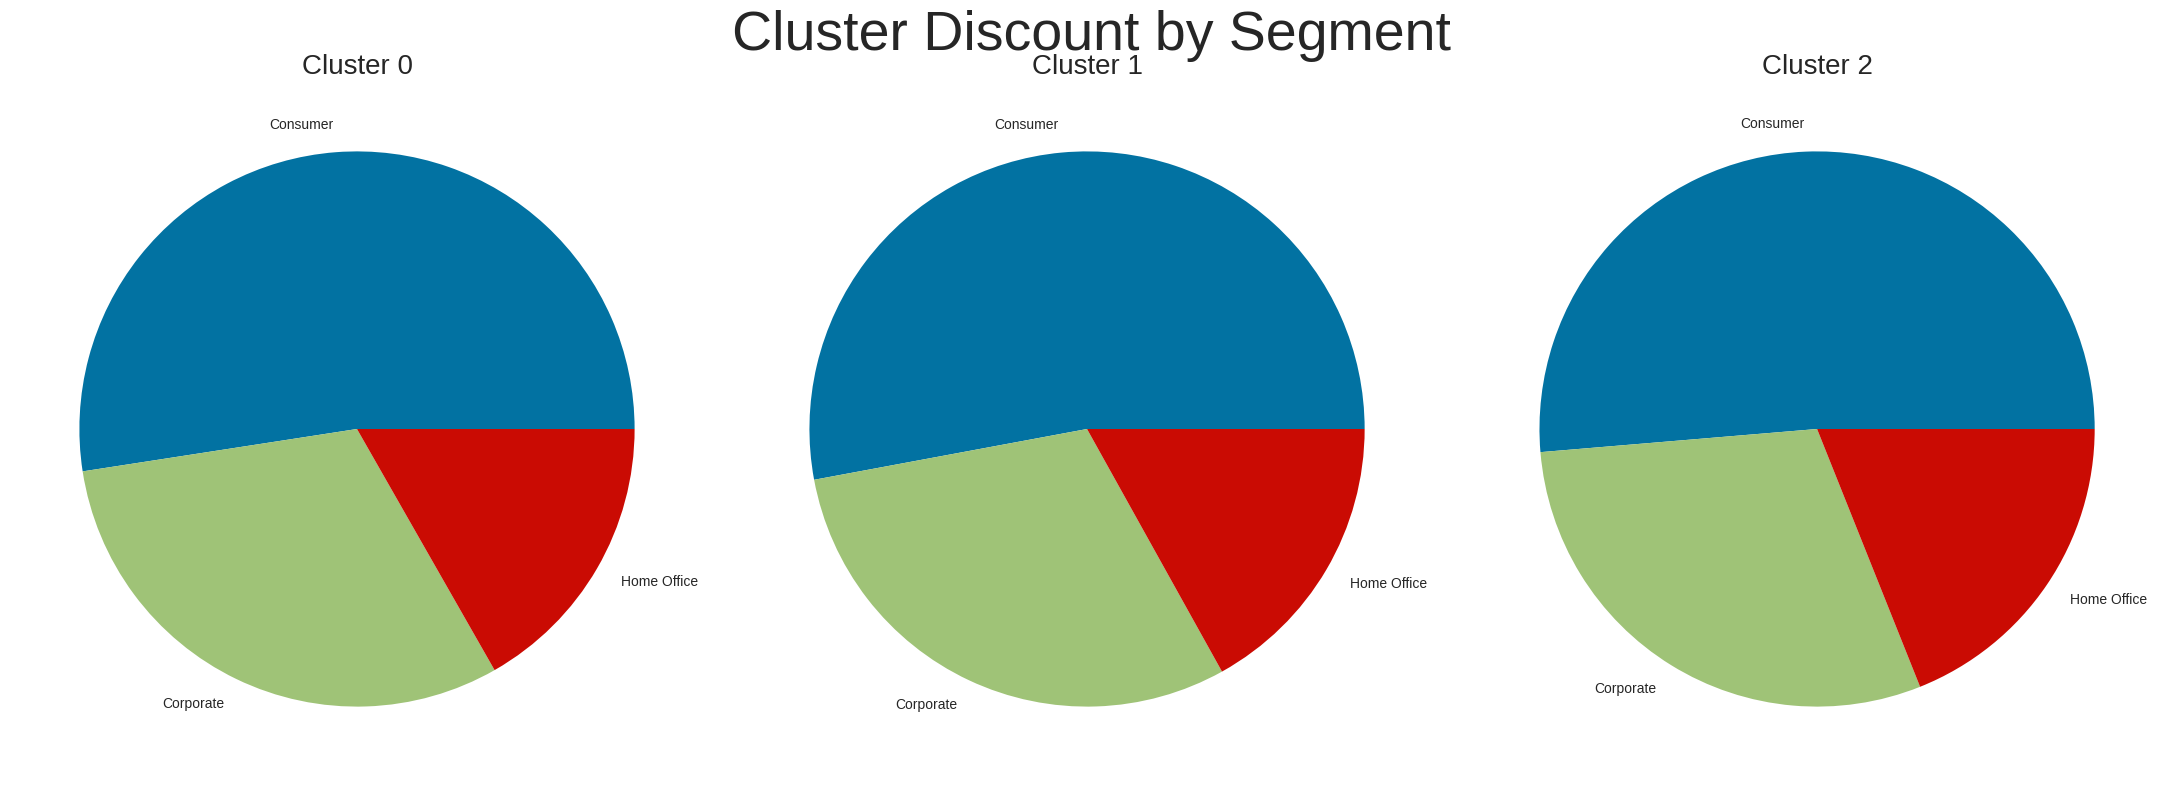

In [88]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(22,8))

df_discount[df_discount['Cluster_KMeans'] == 0].groupby('Segment').size().plot(kind='pie', ax=ax1)
df_discount[df_discount['Cluster_KMeans'] == 1].groupby('Segment').size().plot(kind='pie', ax=ax2)
df_discount[df_discount['Cluster_KMeans'] == 2].groupby('Segment').size().plot(kind='pie', ax=ax3)


ax1.set_title('Cluster 0',size=20)
ax2.set_title('Cluster 1',size=20)
ax3.set_title('Cluster 2',size=20)

fig.suptitle("Cluster Discount by Segment",fontsize=40)
plt.tight_layout()

plt.show()